### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load Data

In [2]:
dataframe = pd.read_csv("abalone.csv")
dataframe.dropna() #Removes Missing Values
dataframe = pd.get_dummies(dataframe, columns=["sex"]) #One hot encode "sex" label
dataframe

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [3]:
#Convert Dataframe to Dataset
def df_to_ds(dataframe, selected_features, selected_targets, batch_size=32):
    features = dataframe[selected_features]
    targets = dataframe[selected_targets]
    ds = tf.data.Dataset.from_tensor_slices((dict(features), np.array(targets)))
    ds = ds.batch(batch_size)
    return ds

In [4]:
#Selected Features and Target
selected_features = [
    "length",
    "diameter",
    "height",
    "whole-weight",
    "rings"]

selected_targets = ["sex_M", "sex_F", "sex_I"]

#Feature Columns
feature_columns = [
    tf.feature_column.numeric_column("length"),
    tf.feature_column.numeric_column("diameter"),
    tf.feature_column.numeric_column("height"),
    tf.feature_column.numeric_column("rings")
]

#Create Tensorflow Datasets
train_per = 0.6
validation_per = 0.3
test_per = 0.1
batch_size = 32

train_dataframe, test_dataframe = train_test_split(dataframe, test_size=test_per)
train_dataframe, validation_dataframe = train_test_split(train_dataframe, test_size=validation_per / (1 - test_per))

train_dataset = df_to_ds(
    train_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)
validation_dataset = df_to_ds(
    validation_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)
test_dataset = df_to_ds(
    test_dataframe,
    selected_features,
    selected_targets,
    batch_size=batch_size)

### Create Models

In [5]:
linear_model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
])

linear_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

In [6]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns),
    tf.keras.layers.Dense(10, activation=tf.nn.leaky_relu, kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation=tf.nn.leaky_relu, kernel_regularizer=tf.keras.regularizers.l2(0.01), bias_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(3),
])

nn_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"])

### Train Models

In [7]:
def plot_loss(model):
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.plot(model.history.history["loss"], label="loss")
    if("val_loss" in model.history.history.keys()):
        plt.plot(model.history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()

In [8]:
def plot_accuracy(model):
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.tight_layout()
    plt.plot(model.history.history["accuracy"], label="accuracy")
    if("val_accuracy" in model.history.history.keys()):
        plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



79/79 - 2s - loss: 8.9452 - accuracy: 0.3109 - val_loss: 8.2646 - val_accuracy: 0.3304
Epoch 2/30
79/79 - 1s - loss: 7.7251 - accuracy: 0.3109 - val_loss: 7.0676 - val_accuracy: 0.3304
Epoch 3/30
79/79 - 1s - loss: 6.5104 - accuracy: 0.3109 - val_loss: 5.8766 - val_accuracy: 0.3304
Epoch 4/30
79/79 - 1s - loss: 5.3044 - accuracy: 0.3109 - val_loss: 4.6983 - val_accuracy: 0.3304
Epoch 5/30
79/79 - 1s - loss: 4.1222 - accuracy: 0.3109 - val_loss: 3.5599 - val_accuracy: 0.3304
Epoch 6/30
79/79 - 1s - loss: 3.0196 - accuracy: 0.3109 - val_loss: 2.5557 - val_accuracy: 0.3312
Epoch 7/30
79/79 - 1s - loss: 2.1434 - accuracy: 0.3117 - val_loss: 1.8666 - val_accuracy: 0.3288
Epoch 8/30
79/79 - 1s - loss: 1.6228 - accuracy: 0.3312 - val_loss: 1.5043 - val_accuracy: 0.3272
Epoch 9/30
79/79 - 1s - loss: 1.3528 - accuracy: 0.3484 - val_loss: 1.3018 - val_accuracy: 0.3352
Epoch 10/30
79/79 - 1s - loss: 1.2075 - accuracy: 0.3747 - val_loss: 1.1979 - val_accuracy: 0.3312
Epoch 11/30
79/79 - 1s - loss:

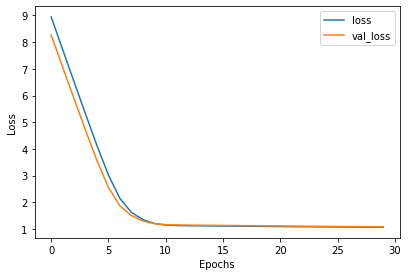

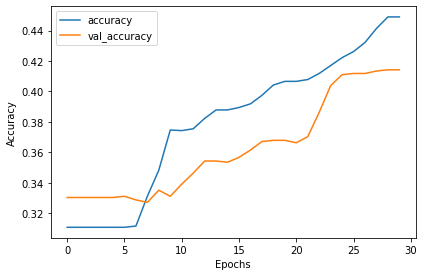

In [9]:
linear_model.fit(train_dataset, validation_data=validation_dataset, epochs=30, verbose=2)

plot_loss(linear_model)
plot_accuracy(linear_model)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



79/79 - 2s - loss: 1.2220 - accuracy: 0.3747 - val_loss: 1.1807 - val_accuracy: 0.3400
Epoch 2/30
79/79 - 1s - loss: 1.1662 - accuracy: 0.3735 - val_loss: 1.1601 - val_accuracy: 0.3432
Epoch 3/30
79/79 - 1s - loss: 1.1471 - accuracy: 0.3767 - val_loss: 1.1431 - val_accuracy: 0.3472
Epoch 4/30
79/79 - 1s - loss: 1.1316 - accuracy: 0.3815 - val_loss: 1.1293 - val_accuracy: 0.3559
Epoch 5/30
79/79 - 1s - loss: 1.1190 - accuracy: 0.3879 - val_loss: 1.1180 - val_accuracy: 0.3559
Epoch 6/30
79/79 - 1s - loss: 1.1086 - accuracy: 0.3931 - val_loss: 1.1086 - val_accuracy: 0.3735
Epoch 7/30
79/79 - 1s - loss: 1.0998 - accuracy: 0.4006 - val_loss: 1.1006 - val_accuracy: 0.3735
Epoch 8/30
79/79 - 1s - loss: 1.0924 - accuracy: 0.4094 - val_loss: 1.0940 - val_accuracy: 0.3735
Epoch 9/30
79/79 - 1s - loss: 1.0861 - accuracy: 0.4174 - val_loss: 1.0883 - val_accuracy: 0.4190
Epoch 10/30
79/79 - 1s - loss: 1.0806 - accuracy: 0.4310 - val_loss: 1.0833 - val_accuracy: 0.4190
Epoch 11/30
79/79 - 1s - loss:

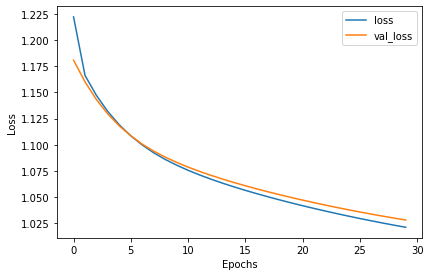

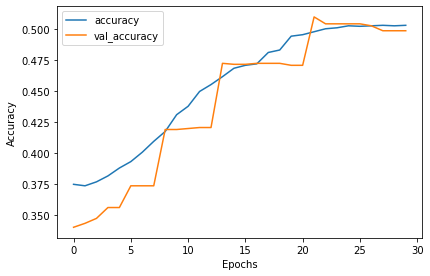

In [10]:
nn_model.fit(train_dataset, validation_data=validation_dataset, epochs=30, verbose=2)

plot_loss(nn_model)
plot_accuracy(nn_model)

### Evaluation

In [11]:
linear_model.evaluate(test_dataset)

14/14 [==============================] - 0s 8ms/step - loss: 1.0486 - accuracy: 0.4569


[1.0485764741897583, 0.4569377899169922]

In [12]:
nn_model.evaluate(test_dataset)

14/14 [==============================] - 0s 13ms/step - loss: 1.0086 - accuracy: 0.5502


[1.0086294412612915, 0.5502392053604126]

### Predictions

In [13]:
labels = test_dataframe[selected_targets].reset_index(drop=True)

In [14]:
linear_predictions = pd.DataFrame(tf.nn.softmax(linear_model.predict(test_dataset)).numpy()).join(labels)
linear_predictions.columns = ["probability_M", "probability_F", "probability_I", "label_M", "label_F", "label_I"]

linear_prediction_values = linear_predictions[list(linear_predictions.columns[0:3])].idxmax(axis=1).apply(lambda x : linear_predictions.columns.get_loc(x) + 3)
linear_label_values = linear_predictions[list(linear_predictions.columns[3:6])].idxmax(axis=1).apply(lambda x : linear_predictions.columns.get_loc(x))

linear_predictions["correct"] = linear_prediction_values.combine(linear_label_values, lambda x, y : x == y)

linear_predictions

,probability_M,probability_F,probability_I,label_M,label_F,label_I,correct
0,0.399825,0.299008,0.301167,0,0,1,False
1,0.352900,0.212840,0.434260,0,0,1,True
2,0.386883,0.358637,0.254481,0,1,0,False
3,0.410784,0.276764,0.312453,0,0,1,False
4,0.381329,0.201578,0.417093,0,0,1,True
...,...,...,...,...,...,...,...
413,0.380548,0.253456,0.365995,0,0,1,False
414,0.413533,0.232380,0.354087,1,0,0,True
415,0.417010,0.266980,0.316009,0,1,0,False
416,0.421828,0.295635,0.282537,1,0,0,True


In [15]:
nn_predictions = pd.DataFrame(tf.nn.softmax(nn_model.predict(test_dataset)).numpy()).join(labels)
nn_predictions.columns = ["probability_M", "probability_F", "probability_I", "label_M", "label_F", "label_I"]

nn_prediction_values = nn_predictions[list(linear_predictions.columns[0:3])].idxmax(axis=1).apply(lambda x : nn_predictions.columns.get_loc(x) + 3)
nn_label_values = nn_predictions[list(linear_predictions.columns[3:6])].idxmax(axis=1).apply(lambda x : nn_predictions.columns.get_loc(x))

nn_predictions["correct"] = nn_prediction_values.combine(nn_label_values, lambda x, y : x == y)

nn_predictions

,probability_M,probability_F,probability_I,label_M,label_F,label_I,correct
0,0.362929,0.311909,0.325162,0,0,1,False
1,0.262086,0.208338,0.529576,0,0,1,True
2,0.382899,0.335296,0.281805,0,1,0,False
3,0.363405,0.312490,0.324105,0,0,1,False
4,0.290050,0.235325,0.474625,0,0,1,True
...,...,...,...,...,...,...,...
413,0.315291,0.260610,0.424099,0,0,1,True
414,0.341134,0.287844,0.371021,1,0,0,False
415,0.363600,0.312730,0.323670,0,1,0,False
416,0.383979,0.336710,0.279311,1,0,0,True


### Backend

#### Linear

In [16]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [17]:
linear_model.history.params

{'verbose': 0, 'epochs': 1, 'steps': 14}

In [18]:
for layer in linear_model.layers:
    print(layer.get_weights())

[]
[array([[-0.0067465 , -0.59929866,  0.21066992],
       [ 0.06100454, -0.38357407, -0.15530111],
       [ 0.6512007 , -0.30977985,  0.5848325 ],
       [ 0.00990084,  0.13922398, -0.11583212]], dtype=float32), array([ 0.11929043, -0.5987299 ,  0.9441433 ], dtype=float32)]


#### Neural Network

In [19]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_1 (DenseFeatu multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  50        
_________________________________________________________________
dense_2 (Dense)              multiple                  55        
_________________________________________________________________
dense_3 (Dense)              multiple                  18        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [20]:
nn_model.history.params

{'verbose': 0, 'epochs': 1, 'steps': 14}

In [21]:
for layer in nn_model.layers:
    print(layer.get_weights())

[]
[array([[-3.7819475e-05,  5.7768397e-02,  1.7616557e-02,  4.6271507e-02,
         5.8181182e-02, -2.8584553e-05,  5.6803336e-05, -5.6222212e-05,
         2.8014727e-02,  1.7375473e-02],
       [-6.9673413e-05,  2.5469953e-02,  8.4823407e-03,  2.6049258e-02,
         2.5471902e-02, -1.0367596e-05,  6.3307270e-06, -3.1748594e-05,
         1.6190125e-02,  8.4943399e-03],
       [-8.2134917e-05,  5.7900142e-02,  1.6960308e-02,  5.0196294e-02,
         6.0827818e-02, -2.0198133e-05,  3.4563257e-06, -5.4000877e-05,
         2.3882344e-02,  1.7362097e-02],
       [-9.2824950e-04,  3.2997674e-01,  5.9754308e-02,  1.7927888e-01,
         4.4003323e-01, -2.9088077e-03, -1.2247008e-04, -1.3185384e-02,
         2.7448535e-01,  6.6604540e-02]], dtype=float32), array([ 2.9312496e-04, -2.1501900e-01, -8.6758532e-02, -2.3175201e-01,
       -2.0939401e-01,  1.2648103e-04, -3.1062758e-05,  8.7593182e-04,
       -1.3940179e-01, -8.6974718e-02], dtype=float32)]
[array([[ 1.5076162e-05, -1.4281850e-03, 